## **Stcok Market Prediction Using LSTM**

# Collecting The Data

In [1]:
import pandas_datareader as pdr
key="69b12a5c3f120c655f1fd0c47b6dd2e702d69cdd"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

<ipython-input-2-08157bf6935e>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-06-18 00:00:00+00:00,188.74,189.22,187.20,187.88,18484865,45.089739,45.204411,44.721835,44.884286,73939460,0.0,1.0
1,AAPL,2018-06-19 00:00:00+00:00,185.69,186.33,183.45,185.14,33578455,44.361098,44.513993,43.825965,44.229704,134313820,0.0,1.0
2,AAPL,2018-06-20 00:00:00+00:00,186.50,187.20,185.73,186.35,20628701,44.554606,44.721835,44.370654,44.518771,82514804,0.0,1.0
3,AAPL,2018-06-21 00:00:00+00:00,185.46,188.35,184.94,187.25,25711898,44.306152,44.996569,44.181924,44.733780,102847592,0.0,1.0
4,AAPL,2018-06-22 00:00:00+00:00,184.92,186.15,184.70,186.12,27200447,44.177146,44.470992,44.124589,44.463825,108801788,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2023-06-12 00:00:00+00:00,183.79,183.89,180.97,181.27,54754995,183.79,183.89,180.97,181.27,54754995,0.0,1.0
1255,AAPL,2023-06-13 00:00:00+00:00,183.31,184.15,182.44,182.80,54929129,183.31,184.15,182.44,182.80,54929129,0.0,1.0
1256,AAPL,2023-06-14 00:00:00+00:00,183.95,184.39,182.02,183.37,57462882,183.95,184.39,182.02,183.37,57462882,0.0,1.0
1257,AAPL,2023-06-15 00:00:00+00:00,186.01,186.52,183.78,183.96,65433166,186.01,186.52,183.78,183.96,65433166,0.0,1.0
1258,AAPL,2023-06-16 00:00:00+00:00,184.92,186.99,184.27,186.73,101256225,184.92,186.99,184.27,186.73,101256225,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       188.74
1       185.69
2       186.50
3       185.46
4       184.92
         ...  
1254    183.79
1255    183.31
1256    183.95
1257    186.01
1258    184.92
Name: close, Length: 1259, dtype: float64

# Data Pre-Processing

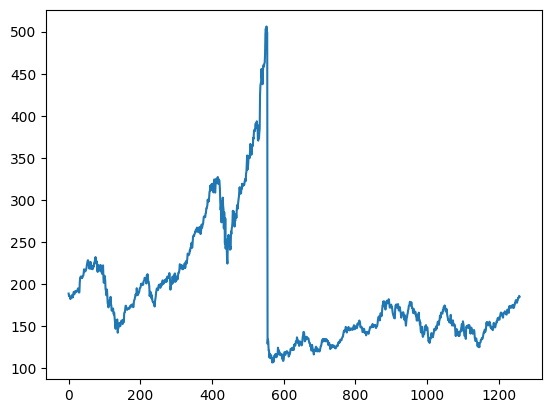

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np

In [12]:
df1

0       188.74
1       185.69
2       186.50
3       185.46
4       184.92
         ...  
1254    183.79
1255    183.31
1256    183.95
1257    186.01
1258    184.92
Name: close, Length: 1259, dtype: float64

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.20513463]
 [0.1974953 ]
 [0.19952411]
 ...
 [0.19313713]
 [0.19829681]
 [0.19556669]]


In [15]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(818, 441)

In [17]:
train_data

array([[2.05134627e-01],
       [1.97495304e-01],
       [1.99524108e-01],
       [1.96919224e-01],
       [1.95566688e-01],
       [1.88678773e-01],
       [1.94339386e-01],
       [1.93663118e-01],
       [1.97019411e-01],
       [1.96042580e-01],
       [2.01227301e-01],
       [1.93061991e-01],
       [1.96768942e-01],
       [2.03206011e-01],
       [2.09743269e-01],
       [2.09167188e-01],
       [2.02980589e-01],
       [2.10870382e-01],
       [2.11621791e-01],
       [2.10569818e-01],
       [2.11922354e-01],
       [2.09292423e-01],
       [2.12999374e-01],
       [2.11897307e-01],
       [2.12323106e-01],
       [2.15804634e-01],
       [2.20363181e-01],
       [2.18835316e-01],
       [2.10745147e-01],
       [2.08065122e-01],
       [2.09016907e-01],
       [2.37094552e-01],
       [2.51847214e-01],
       [2.53350031e-01],
       [2.56055103e-01],
       [2.51145899e-01],
       [2.51496556e-01],
       [2.55579211e-01],
       [2.52197871e-01],
       [2.55554164e-01],


In [18]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# LSTM Model Creation

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 18s 404ms/step - loss: 0.0358 - val_loss: 5.8634e-04
Epoch 2/100
12/12 [==============================] - 2s 201ms/step - loss: 0.0154 - val_loss: 0.0035
Epoch 3/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0102 - val_loss: 4.3242e-04
Epoch 4/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0096 - val_loss: 5.6031e-04
Epoch 5/100
12/12 [==============================] - 4s 309ms/step - loss: 0.0083 - val_loss: 3.4747e-04
Epoch 6/100
12/12 [==============================] - 3s 224ms/step - loss: 0.0074 - val_loss: 6.9758e-04
Epoch 7/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0069 - val_loss: 6.4228e-04
Epoch 8/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0062 - val_loss: 3.4115e-04
Epoch 9/100
12/12 [==============================] - 2s 199ms/step - loss: 0.0054 - val_loss: 6.9712e-04
Epoch 10/100
12/12 [==============================] - 3s 2

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.12.0'

In [29]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 40ms/step


In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

220.85210745323445

In [32]:
math.sqrt(mean_squared_error(ytest,test_predict))

153.6060589665783

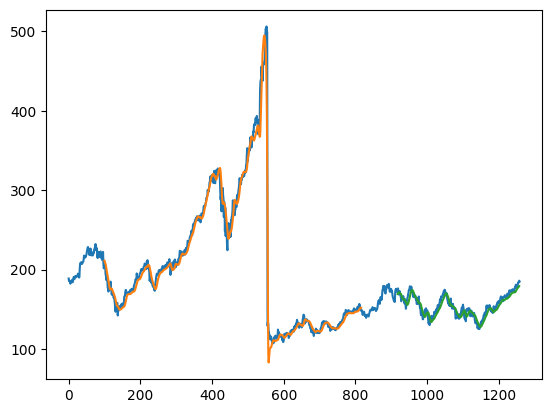

In [33]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

441

In [35]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 101)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.08939261114589853,
 0.08771446462116467,
 0.09297432686286783,
 0.09790857858484658,
 0.09056981840951783,
 0.0938008766437069,
 0.09665623043206006,
 0.11015654351909826,
 0.11937382592360674,
 0.1124358171571696,
 0.11974953036944269,
 0.11291170945522849,
 0.11028177833437691,
 0.1106324358171571,
 0.11774577332498432,
 0.11611772072636184,
 0.12145272385723233,
 0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.135078271759

In [38]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):

        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

0 day input [0.08771446 0.09297433 0.09790858 0.09056982 0.09380088 0.09665623
 0.11015654 0.11937383 0.11243582 0.11974953 0.11291171 0.11028178
 0.11063244 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967
 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553
 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117
 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517
 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583
 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363
 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341 0.13340013
 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589
 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512
 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306
 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134
 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526
 0.16568566 0.17179712 0.1764809  0.17635567 0.183

# Predicting The Stock For Next 30 Days

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
import matplotlib.pyplot as plt

In [41]:
len(df1)

1259

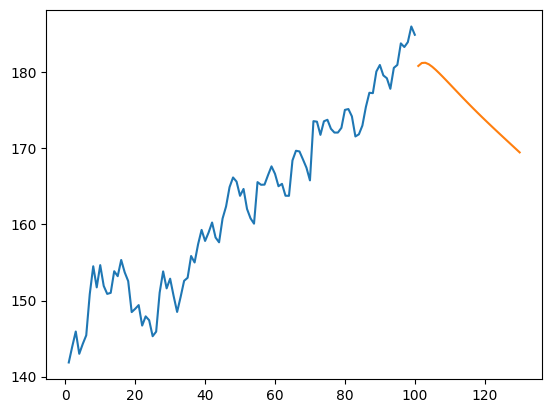

In [43]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

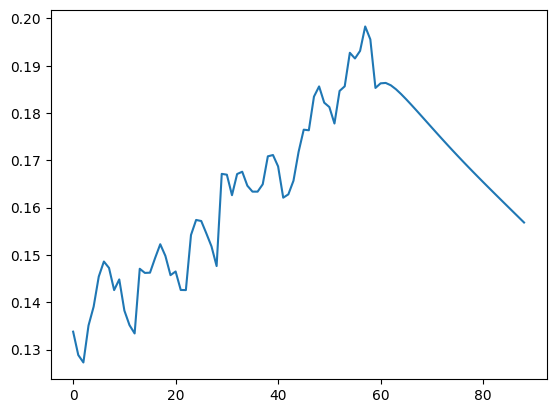

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [45]:
df3=scaler.inverse_transform(df3).tolist()

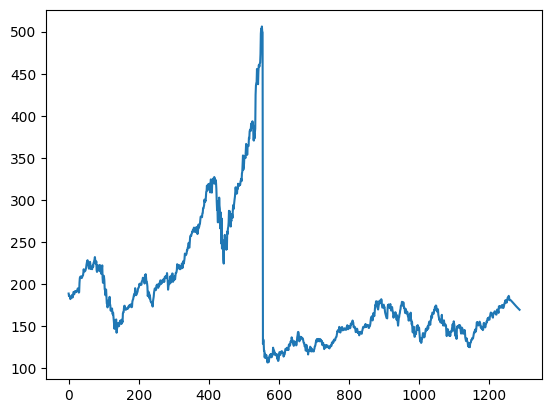

In [46]:
plt.plot(df3)